### Section 1: Test first-wave framework and allocation

We test the current first-wave allocation algorithm. We (1) generate a lattice from our choice of features/levels, (2) compute the true effects, (3) compute the boundary probabilities and find our optimal allocations, (4) simulate first-wave outcomes, and (5) visualize.

In [298]:
import numpy as np
import matplotlib.pyplot as plt
from lattice import generate_lattice
from underlying_causal import compute_true_effects
from first_wave_allocation import compute_boundary_probabilities, allocate_first_wave
from first_wave_simulation import first_wave_simulate_data

In [299]:
# Parameters
R = 6
M = 2
H = 3
n1 = 250
sigma = 1.0
seed = 10

In [300]:
# Step 1: Lattice
lattice = generate_lattice(R, M)
print(f"Lattice shape: {lattice.shape} (should be ({R**M}, {M}))")

# Additional lattice checks
assert np.all(lattice >= 0) and np.all(lattice < R), "Lattice values out of bounds"
assert len(np.unique(lattice, axis=0)) == R**M, "Lattice points are not unique"

Lattice shape: (36, 2) (should be (36, 2))


In [301]:
# Step 2: Ground truth φ
beta = compute_true_effects(lattice, model="interaction")

# Check beta properties
assert len(beta) == R**M, "Beta length doesn't match lattice size"
print(f"Beta range: [{beta.min():.3f}, {beta.max():.3f}]")

Beta range: [0.000, 24.811]


In [302]:
# Step 3: Allocation
boundary_probs = compute_boundary_probabilities(lattice, R=R, H=H)
allocation = allocate_first_wave(n1, boundary_probs)

# Check allocation properties and boundary
assert np.all(boundary_probs >= 0), "Negative boundary probabilities found"
print(f"Total allocated: {allocation.sum()} (should equal n1 = {n1})")
print(f"Number of non-zero allocations: {np.sum(allocation > 0)}")
print(f"Maximum allocation at any point: {np.max(allocation)}")

Total allocated: 250 (should equal n1 = 250)
Number of non-zero allocations: 32
Maximum allocation at any point: 9


In [303]:
# Step 4: Simulate first-wave outcomes
D, y = first_wave_simulate_data(lattice, beta, allocation, sigma=sigma, seed=seed)

print(f"D shape: {D.shape} (n1 × K), y shape: {y.shape}")
assert D.shape[0] == n1 and y.shape[0] == n1, "Data dimensions mismatch"
assert D.shape[1] == len(beta), "Design matrix width mismatch"

D shape: (250, 36) (n1 × K), y shape: (250,)


### Section 2: Visualize data and allocation

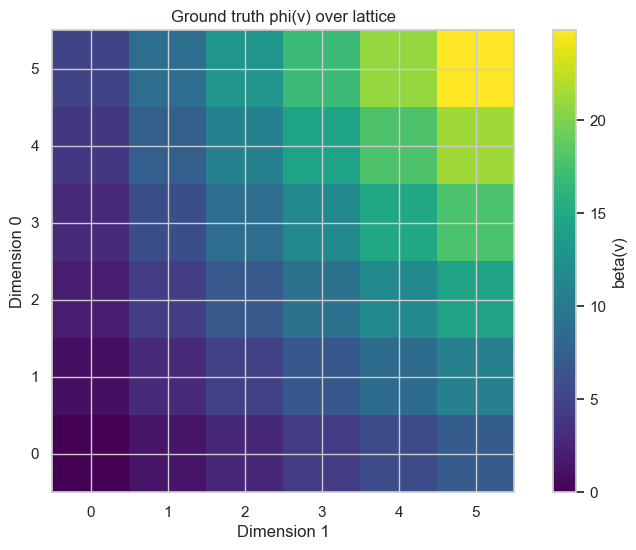

In [304]:
# Heatmap of ground truths over grid
if M == 2:
    beta_grid = beta.reshape(R, R)
    plt.imshow(beta_grid, cmap="viridis", origin="lower")
    plt.colorbar(label="beta(v)")
    plt.title("Ground truth phi(v) over lattice")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 0")
    plt.show()


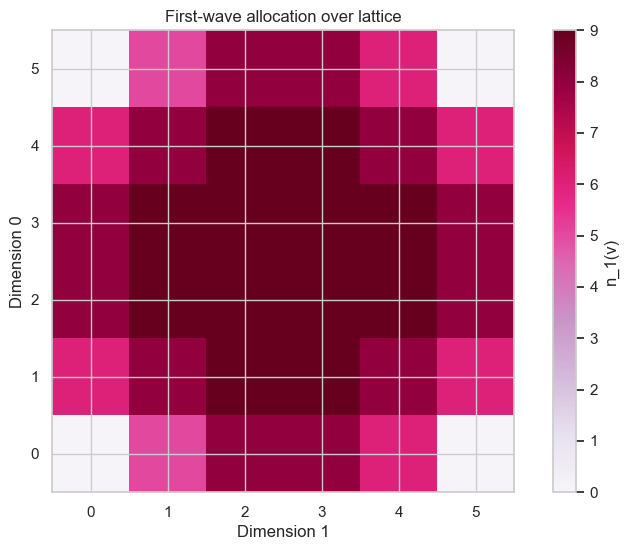

In [305]:
# (2) Allocation map
if M == 2:
    allocation_grid = allocation.reshape(R, R)
    plt.imshow(allocation_grid, cmap="PuRd", origin="lower")
    plt.colorbar(label="n_1(v)")
    plt.title("First-wave allocation over lattice")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 0")
    plt.show()

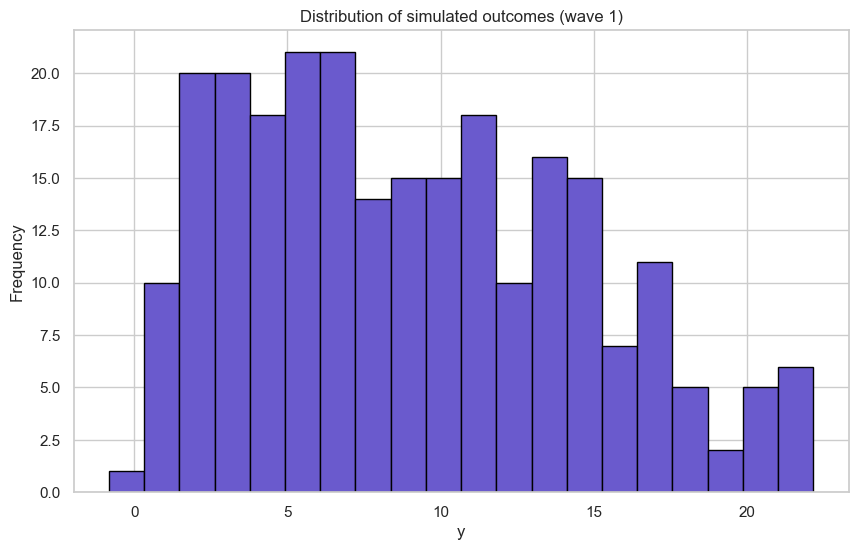

In [306]:
# Outcome histogram
plt.hist(y, bins=20, color="slateblue", edgecolor="black")
plt.title("Distribution of simulated outcomes (wave 1)")
plt.xlabel("y")
plt.ylabel("Frequency")
plt.show()

In [307]:
# Additional statistical checks
print("\nStatistical Properties:")
print(f"Mean outcome: {y.mean():.3f}")
print(f"Outcome std dev: {y.std():.3f}")
print(f"Outcome range: [{y.min():.3f}, {y.max():.3f}]")


Statistical Properties:
Mean outcome: 9.100
Outcome std dev: 5.514
Outcome range: [-0.833, 22.180]
